In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,precision_recall_fscore_support, classification_report, ConfusionMatrixDisplay

In [2]:
os.chdir('/content/')
!ls

Dry_Bean_Dataset.csv  NHANES_age_prediction.csv  sample_data


Dataset 1

In [3]:
df =  pd.read_csv('Dry_Bean_Dataset.csv')
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

Bivariate Plot

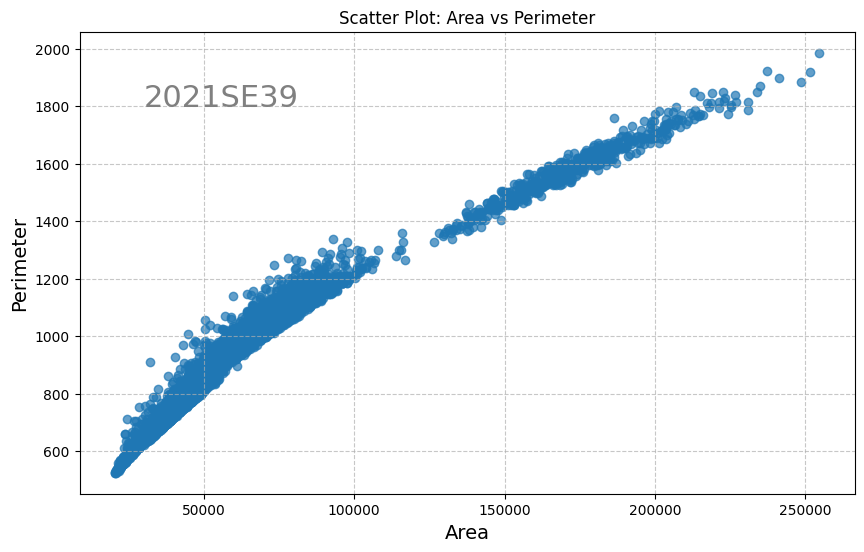

In [4]:
x = df['Area']
y = df['Perimeter']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('Scatter Plot: Area vs Perimeter')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Perimeter', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.text(x=30000, y=1800, s="2021SE39", fontsize=22, color='grey')
plt.show()

Multivariate Plot

In [5]:
variables_box = ['Eccentricity', 'roundness', 'Compactness', 'Solidity']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[variables_box])
plt.title('Box Plot of Multiple Continuous Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.text(x='Compactness', y=0.3, s="2021SE39", fontsize=22, color='grey')
plt.show()

In [6]:
X = df.drop(columns=['Class'])
y = df['Class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))

0.7352185089974294


In [9]:
print("Results for kNN:")
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_knn)
cm = np.transpose(cm)
print(cm,'\n')
cm_report = classification_report(y_test, y_pred_knn, digits=3)
print(cm_report)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(colorbar=False, cmap='Blues')
cmd.ax_.set(xlabel='Actual', ylabel='Predicted', title='Confusion Matrix Actual vs Predicted')
plt.show()

Results for kNN:
Confusion Matrix
[[139   0 103   0  46   2  10]
 [  0 103   0   0   0   0   0]
 [ 89   0 217   0  18   2   3]
 [  1   0   0 625   8  66  69]
 [ 37   0  13   4 266   6  36]
 [  0   0   0  25   0 273  24]
 [  4   0   0  51  48  56 379]] 

              precision    recall  f1-score   support

    BARBUNYA      0.463     0.515     0.488       270
      BOMBAY      1.000     1.000     1.000       103
        CALI      0.660     0.652     0.656       333
    DERMASON      0.813     0.887     0.848       705
       HOROZ      0.735     0.689     0.711       386
       SEKER      0.848     0.674     0.751       405
        SIRA      0.704     0.727     0.716       521

    accuracy                          0.735      2723
   macro avg      0.746     0.735     0.738      2723
weighted avg      0.740     0.735     0.735      2723



NB

In [10]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))

0.7645978699963276


In [11]:
print("Results for Naive Bayes:")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_nb)
cm = np.transpose(cm)
print(cm,'\n')
cm_report = classification_report(y_test, y_pred_nb, digits=3)
print(cm_report)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(colorbar=False, cmap='Blues')
cmd.ax_.set(xlabel='Actual', ylabel='Predicted', title='Confusion Matrix Actual vs Predicted')
plt.show()

Results for Naive Bayes:
Confusion Matrix:
[[128   0  63   0  16   5   0]
 [  0 103   1   0   0   0   0]
 [102   0 257   0  16   0   0]
 [  0   0   0 606   5  64  24]
 [ 31   0  12   0 300   7  44]
 [  0   0   0  62   0 280  45]
 [  9   0   0  37  49  49 408]] 

              precision    recall  f1-score   support

    BARBUNYA      0.604     0.474     0.531       270
      BOMBAY      0.990     1.000     0.995       103
        CALI      0.685     0.772     0.726       333
    DERMASON      0.867     0.860     0.863       705
       HOROZ      0.761     0.777     0.769       386
       SEKER      0.724     0.691     0.707       405
        SIRA      0.739     0.783     0.760       521

    accuracy                          0.765      2723
   macro avg      0.767     0.765     0.765      2723
weighted avg      0.763     0.765     0.762      2723



Dataset 2

In [12]:
df =  pd.read_csv('NHANES_age_prediction.csv')
df.head()

SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92

Bivariate Plot

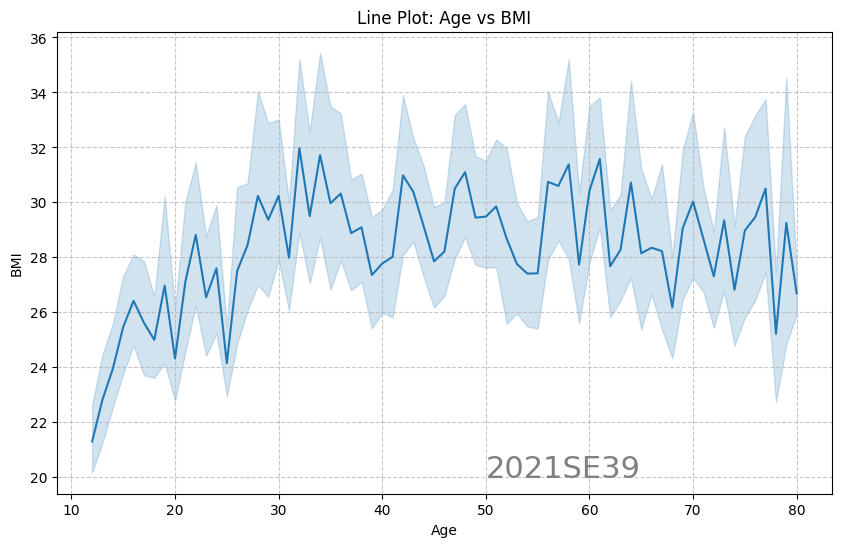

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='RIDAGEYR', y='BMXBMI')
plt.title('Line Plot: Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True, linestyle='--', alpha=0.7)
plt.text(x=50, y=20, s="2021SE39", fontsize=22, color='grey')
plt.show()

Multivariate Plot

<Figure size 1000x600 with 0 Axes>

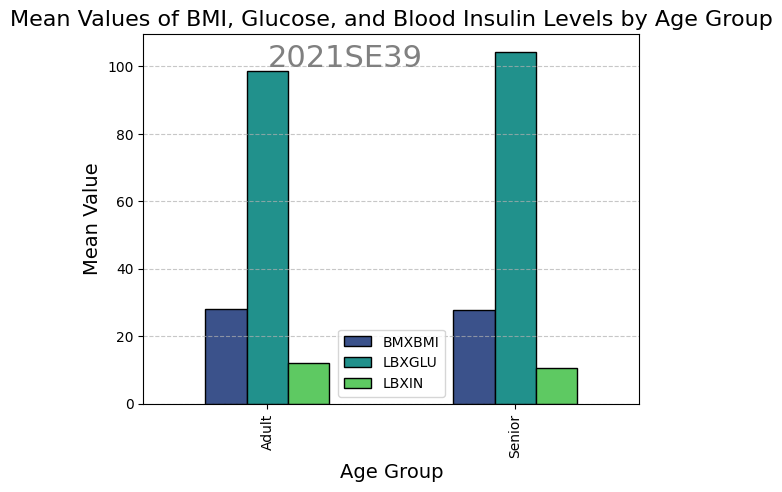

In [14]:
variables_bar = ['BMXBMI', 'LBXGLU', 'LBXIN']
means = df.groupby('age_group')[variables_bar].mean()

plt.figure(figsize=(10, 6))
ax = means.plot(kind='bar', color=sns.color_palette('viridis', len(variables_bar)), edgecolor='black')
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_title('Mean Values of BMI, Glucose, and Blood Insulin Levels by Age Group', fontsize=16)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Mean Value', fontsize=14)
ax.text(x=0, y=100, s="2021SE39", fontsize=22, color='grey')
plt.show()

In [15]:
X = df.drop(columns=['SEQN','age_group']) # SEQN is not included in features because it is Respondent Sequence Number and nothing to do with other features
y = df['age_group']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

KNN

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))

0.9802631578947368


Results for kNN:
Confusion Matrix
[[393   6]
 [  3  54]] 

              precision    recall  f1-score   support

       Adult      0.985     0.992     0.989       396
      Senior      0.947     0.900     0.923        60

    accuracy                          0.980       456
   macro avg      0.966     0.946     0.956       456
weighted avg      0.980     0.980     0.980       456



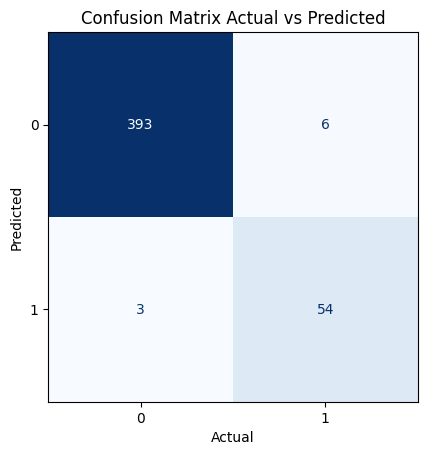

In [18]:
print("Results for kNN:")
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_knn)
cm = np.transpose(cm)
print(cm,'\n')
cm_report = classification_report(y_test, y_pred_knn, digits=3)
print(cm_report)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(colorbar=False, cmap='Blues')
cmd.ax_.set(xlabel='Actual', ylabel='Predicted', title='Confusion Matrix Actual vs Predicted')
plt.show()

NB

In [19]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))

0.9583333333333334


In [20]:
print("Results for Naive Bayes:")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_nb)
cm = np.transpose(cm)
print(cm,'\n')
cm_report = classification_report(y_test, y_pred_nb, digits=3)
print(cm_report)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(colorbar=False, cmap='Blues')
cmd.ax_.set(xlabel='Actual', ylabel='Predicted', title='Confusion Matrix Actual vs Predicted')
plt.show()

Results for Naive Bayes:
Confusion Matrix:
[[385   8]
 [ 11  52]] 

              precision    recall  f1-score   support

       Adult      0.980     0.972     0.976       396
      Senior      0.825     0.867     0.846        60

    accuracy                          0.958       456
   macro avg      0.903     0.919     0.911       456
weighted avg      0.959     0.958     0.959       456

